In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544


In [3]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df[84:96]

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,isJan
84,2021-01-01,1077,8.8,1.081053,0.085161,4.49760,1.02281,2.7350,1.08780,262.200,1.504532,1
85,2021-02-01,126,8.6,1.257895,0.075714,4.17695,1.15288,2.8100,0.79495,263.346,1.520784,0
86,2021-03-01,157,8.4,1.610870,0.069677,-4.13901,1.26088,3.0825,-0.55995,265.028,1.694673,0
87,2021-04-01,98,8.3,1.635000,0.069000,5.55575,1.63163,3.0600,1.13156,266.727,2.284027,0
88,2021-05-01,46,7.9,1.621000,0.058065,-2.75355,2.23433,2.9625,0.39517,268.599,2.623896,0
89,2021-06-01,48,7.9,1.519091,0.078000,4.28688,2.63157,2.9750,0.94626,270.955,2.604632,0
90,2021-07-01,41,7.4,1.318571,0.098065,3.84406,2.76775,2.8680,0.87781,272.184,2.325734,0
91,2021-08-01,53,7.0,1.283182,0.092258,1.48537,1.98385,2.8425,-0.02646,273.092,2.353165,0
92,2021-09-01,61,6.4,1.374762,0.079333,1.12423,1.39428,2.9000,0.94921,274.214,2.649506,0
93,2021-10-01,106,6.1,1.582500,0.079032,-0.96200,0.69872,3.0675,-0.45028,276.590,3.042940,0


---

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


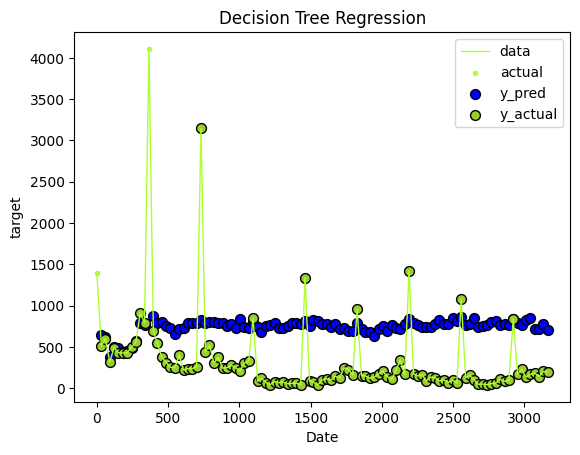

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


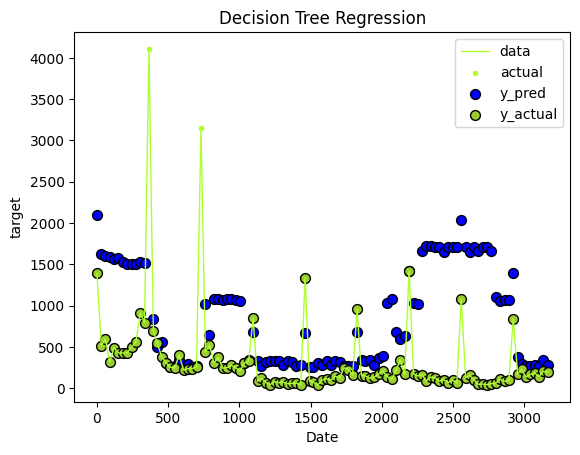

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


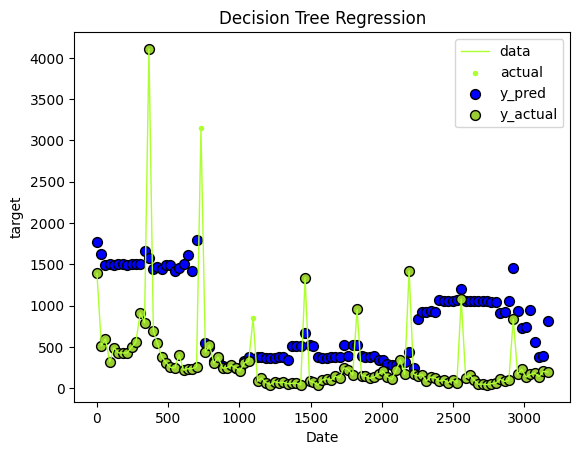

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


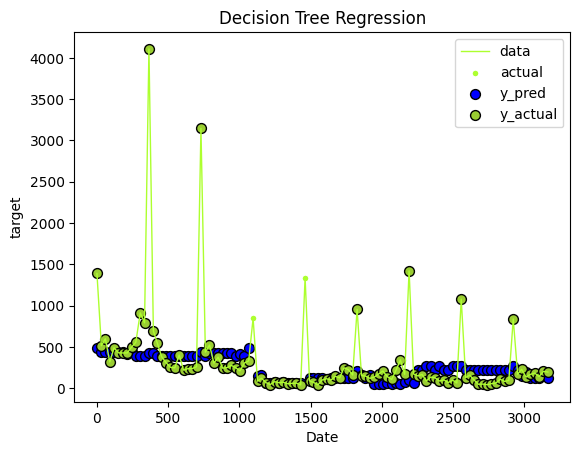

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


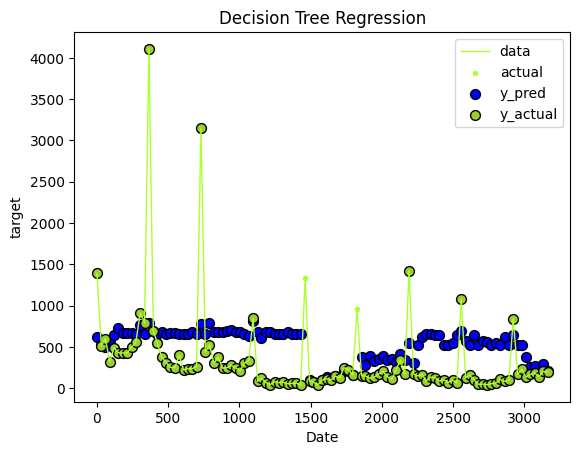

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


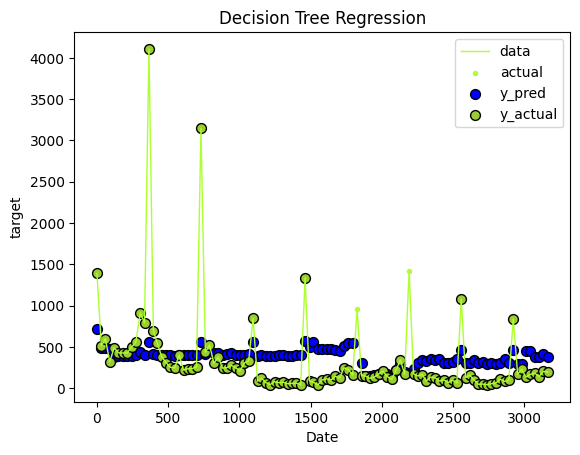

/tmp/ipykernel_32795/2874735059.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


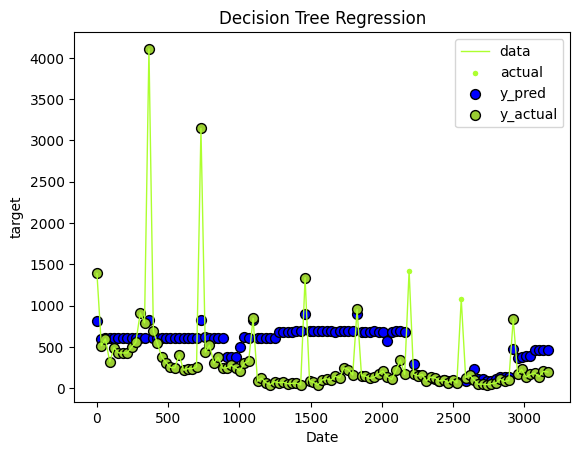

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US', 'isJan']
X = df[feature_labels]
y = df[['FORECLOSURE']]

for i in range(0, 7):
    
    start = i * 12
    end = start + 12

    X_train = X.iloc[start:end]
    X_test = X.drop([start, end])
    y_train = y.iloc[start:end]
    y_test = y.drop([start, end])
    
    regressor = RandomForestRegressor()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

---